In [29]:
import xarray as xr
import numpy as np
from glob import glob
from xgcm.grid import Grid
from matplotlib import pyplot as plt

In [37]:
RAZ =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RAZ.data', dtype='>f4').reshape(2160,2160)
RAC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RAC.data', dtype='>f4').reshape(2160,2160)
DXC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DXC.data', dtype='>f4').reshape(2160,2160)
DYC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DYC.data', dtype='>f4').reshape(2160,2160)
DXG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DXG.data', dtype='>f4').reshape(2160,2160)
DYG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DYG.data', dtype='>f4').reshape(2160,2160)
XC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/XC.data', dtype='>f4').reshape(2160,2160)
YC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YC.data', dtype='>f4').reshape(2160,2160)
XG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/XG.data', dtype='>f4').reshape(2160,2160)
YG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YG.data', dtype='>f4').reshape(2160,2160)
hFacW =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/hFacW.data', dtype='>f4').reshape(-1,2160,2160)
hFacS =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/hFacS.data', dtype='>f4').reshape(-1,2160,2160)
DRF =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DRF.data', dtype='>f4')
RC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RC.data', dtype='>f4')

In [3]:
indir = '/swot/SUM01/LLC/llc_4320_agulhas/'
eul_unfiltered_vels=xr.open_dataset(indir + 'llc_4320_agulhas.0000022464.nc')

In [39]:
ds = eul_unfiltered_vels
grid = Grid(ds,coords={'X': {'center': 'i', 'left': 'i_g'},'Y': {'center': 'j', 'left': 'j_g'}})
ds = ds.assign_coords({"raZ":(["j_g","i_g"],RAZ)})
ds = ds.assign_coords({"raC":(["j","i"],RAC)})
ds = ds.assign_coords({"dxC":(["j","i_g"],DXC)})
ds = ds.assign_coords({"dyC":(["j_g","i"],DYC)})
ds = ds.assign_coords({"dyG":(["j","i_g"],DYG)})
ds = ds.assign_coords({"hFacW":(["k","j","i_g"],hFacW)})
ds = ds.assign_coords({"hFacS":(["k","j_g","i"],hFacS)})
ds = ds.assign_coords({"dxG":(["j_g","i"],DXG)})
ds = ds.assign_coords({"drF":(["k"],DRF)})

In [5]:
ds

<xarray.Dataset>
Dimensions:   (i: 2160, i_g: 2160, j: 2160, j_g: 2160, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 1)
Coordinates: (12/18)
    face      int64 ...
  * i         (i) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
  * i_g       (i_g) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
    iter      (time) int64 ...
  * j         (j) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
  * j_g       (j_g) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
    ...        ...
    raC       (j, i) >f4 1.553e+06 1.553e+06 1.552e+06 ... 3.939e+06 3.94e+06
    dxC       (j, i_g) >f4 1.262e+03 1.261e+03 1.261e+03 ... 2.07e+03 2.07e+03
    dyC       (j_g, i) >f4 1.567e+03 1.567e+03 1.567e+03 ... 1.903e+03 1.903e+03
    dyG       (j, i_g) >f4 1.231e+03 1.231e+03 1.231e+03 ... 1.903e+03 1.903e+03
    dxG       (j_g, i) >f4 1.261e+03 1.261e+03 1.261e+03 ... 2.07e+03 2.07e+03
    drF       (k) >f4 1.0 1.14 1.3 1.49 1.7 ... 334.6 365.9 400.4 438.2 479.7
Data variables: (12/19)
    Eta       (time, j, i) float32 ...
    PhiBot    (time, j, i) float32 ...
    SIarea    (time, j, i) float32 ...
    SIheff    (time, j, i) float32 ...
    SIhsalt   (time, j, i) float32 ...
    SIhsnow   (time, j, i) float32 ...
    ...        ...
    oceFWflx  (time, j, i) float32 ...
    oceQnet   (time, j, i) float32 ...
    oceQsw    (time, j, i) float32 ...
    oceSflux  (time, j, i) float32 ...
    oceTAUX   (time, j, i_g) float32 ...
    oceTAUY   (time, j_g, i) float32 ...
Attributes:
    history:  Tue May  2 17:26:52 2017: ncks -O --create_ram --mk_rec_dmn tim...
    NCO:      4.4.4

In [40]:
eul_unf_utransport = eul_unfiltered_vels.U*ds.dyG*ds.hFacW*ds.drF
eul_unf_vtransport = eul_unfiltered_vels.V*ds.dxG*ds.hFacS*ds.drF

In [41]:
div_unf_eul = (grid.diff(eul_unf_utransport, 'X') + grid.diff(eul_unf_vtransport, 'Y')) / ds.raC
div_unf_eul = div_unf_eul.assign_coords({"rC":(["k"],RC)})

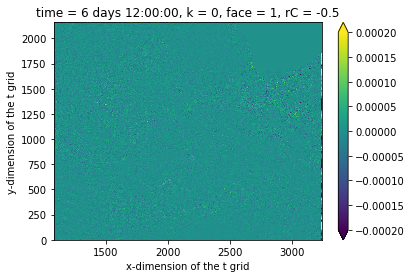

In [42]:
div_unf_eul.isel(k=0).plot(vmin=-2*10**-4, vmax=2*10**-4)

(-200.0, 0.0)

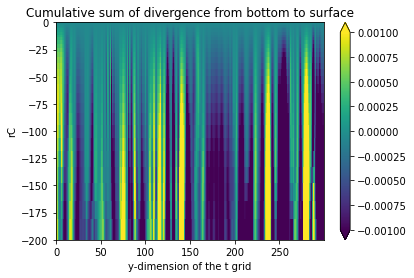

In [51]:
div_unf_eul.isel(i=2000).isel(j=slice(0,300))[:,::-1,:].cumsum('k').plot(x="j", y="rC",vmin=-10**-3, vmax=10**-3)
plt.title('Cumulative sum of divergence from bottom to surface')
plt.ylim(-200,0)

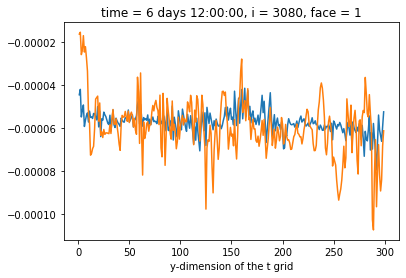

In [58]:
div_unf_eul.isel(i=2000).isel(j=slice(1,300))[:,::-1,:].sum('k').plot()
div_unf_eul.isel(i=2000).isel(j=slice(1,300))[:,:0:-1,:].sum('k').plot()
#div_unf_eul.isel(i=2000).isel(j=slice(1,300))[:,:1:-1,:].sum('k').plot()

In [61]:
div_unf_eul.isel(i=2000).isel(j=slice(1,300))[:,::-1,:]

<xarray.DataArray (time: 1, k: 90, j: 299)>
array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-3.5517620e-05, -3.3752163e-05, -3.6770947e-05, ...,
          2.3408442e-05,  1.1794826e-05,  1.1843323e-05],
        [-3.1736883e-05, -3.0016525e-05, -3.2727559e-05, ...,
          2.0475714e-05,  1.0223192e-05,  1.0224618e-05],
        [-2.8252116e-05, -2.6602200e-05, -2.9034572e-05, ...,
          1.7890059e-05,  8.8546367e-06,  8.8268880e-06]]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 6 days 12:00:00
  * k        (k) int64 89 88 87 86 85 84 83 82 81 80 79 ... 9 8 7 6 5 4 3 2 1 0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 ... 295.0 296.0 297.0 298.0 299.0
    i        int64 3080
    face     int64 1
    raC      (j) >f4 1.553e+06 1.554e+06 1.555e+06 ... 1.799e+06 1.799e+06
    rC       (k) >f4 -6.76e+03 -6.301e+03 -5.882e+03 ... -2.79 -1.57 -0.5